# Predicting Stock Price using Machine Learning Models

## 1. Problem Definition
We're going to go through step by step based on [this site](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/) to get the basic idea of how stock works (I still don't know much)

> How to visualize the stock price

> How to predict stock price of Tata Global Beverages (forecasting)

## 2. Data
Downloaded from [Quandl](https://www.quandl.com/data/NSE/TATAGLOBAL-Tata-Global-Beverages-Limited)

## 3. Evaluation
The algorithms we will be using are such as follows:
* Linear Regression
* K-Nearest Neighbors
* Long Short Term Memory (LSTM)
* Moving Average
* Prophet
* Auto ARIMA


## 4. Features
There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low and Last represent the maximum, minimum, and last price of the share for the day.
* Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df0 = pd.read_csv('./datasets/stock-tata-global.csv')
df0

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
# Check missing values
df0.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
# Make a copy so we can manipulate the data
df = df0.copy()
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [6]:
# Convert Date to datetime
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 77.3 KB


In [7]:
# Sort by oldest date
df.sort_index(ascending=False, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
3,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
4,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
1230,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
1231,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
1232,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1233,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


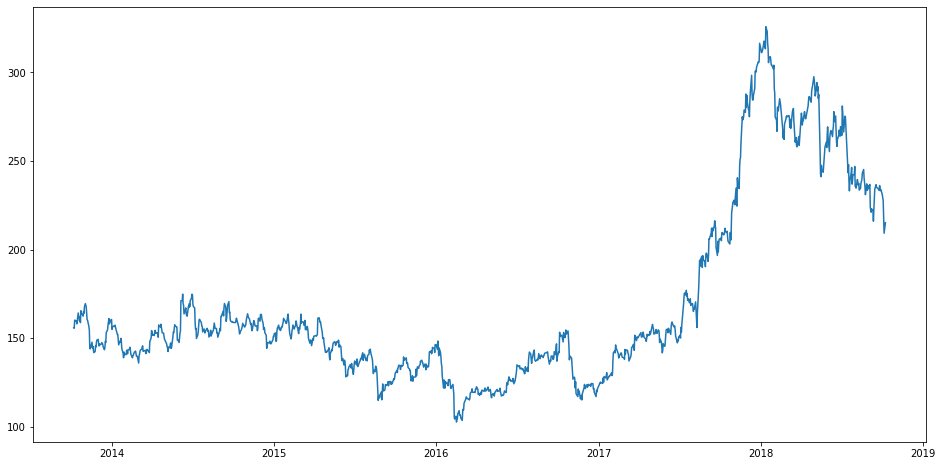

In [8]:
# Quick plot
plt.figure(figsize=(16,8))
plt.plot(df.Date, df.Close);

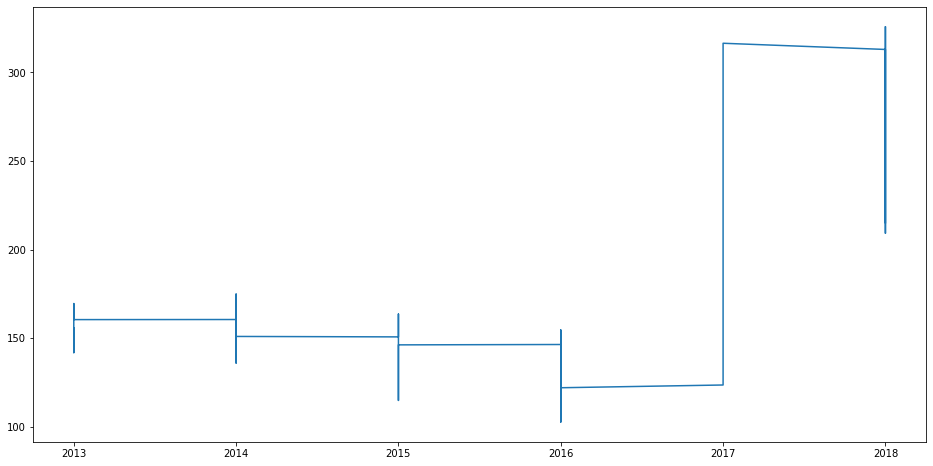

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df.Date.dt.year, df.Close);

Now, we need to split the data into training and validation sets. Remember: **we use machine learning to learn from the past to predict the future**. In this case, we're going to use the first 5 years as training sets while the rest as validation sets.

## Moving Average

In [10]:
df.Date.dt.year.value_counts()

2017    248
2015    248
2016    247
2014    244
2018    190
2013     58
Name: Date, dtype: int64

In [11]:
# # Make a new copy with date and the target variable
# df_new = df[['Date', 'Close']]
# df_new

In [12]:
58+244+248+247+248

1045

In [13]:
train = df[:1045]
valid = df[1045:]
len(train), len(valid)

(1045, 190)

In [14]:
train.reset_index(drop=True, inplace=True)
train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
3,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
4,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
1040,2017-12-22,301.00,306.35,299.70,302.80,302.75,4703911.0,14271.47
1041,2017-12-26,303.70,307.70,300.55,305.50,305.95,3956481.0,12073.55
1042,2017-12-27,305.50,308.80,302.50,305.65,305.55,3315278.0,10164.51
1043,2017-12-28,306.50,309.30,303.55,306.80,306.60,4620000.0,14164.22


In [15]:
valid.reset_index(drop=True, inplace=True)
valid

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-01-01,317.75,317.80,311.80,313.45,312.90,1602814.0,5040.75
1,2018-01-02,314.30,314.95,307.55,310.70,311.15,2014415.0,6252.42
2,2018-01-03,311.90,315.15,310.15,310.95,311.20,2073353.0,6469.92
3,2018-01-04,312.00,313.50,307.25,312.30,312.25,2703849.0,8380.41
4,2018-01-05,312.30,315.85,310.35,312.85,312.95,1896601.0,5938.16
...,...,...,...,...,...,...,...,...
185,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
186,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
187,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
188,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [16]:
preds = []
for i in range(0, len(valid)):
    a = train['Close'][len(train)-190+i:].sum() + sum(preds)
    b = a/190
    preds.append(b)

rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print(f'RMSE value on validation set: {rms}')

RMSE value on validation set: 58.9207645125333


In [17]:
#plot
valid = valid.copy() # Remove warning... somehow
valid['Predictions'] = preds
valid

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Predictions
0,2018-01-01,317.75,317.80,311.80,313.45,312.90,1602814.0,5040.75,195.703684
1,2018-01-02,314.30,314.95,307.55,310.70,311.15,2014415.0,6252.42,195.941335
2,2018-01-03,311.90,315.15,310.15,310.95,311.20,2073353.0,6469.92,196.179974
3,2018-01-04,312.00,313.50,307.25,312.30,312.25,2703849.0,8380.41,196.422237
4,2018-01-05,312.30,315.85,310.35,312.85,312.95,1896601.0,5938.16,196.663670
...,...,...,...,...,...,...,...,...,...
185,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,218.544199
186,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,218.101011
187,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,217.638648
188,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,217.175956


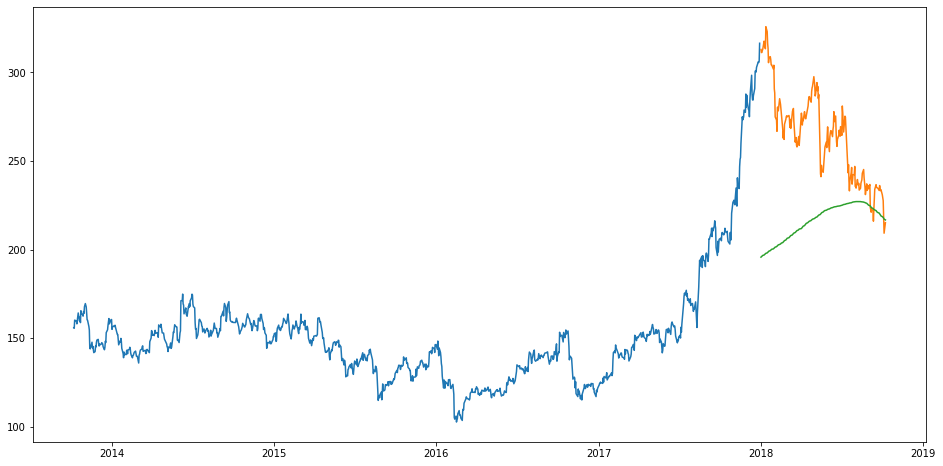

In [18]:
# plt.plot(X_train['Close'])
plt.figure(figsize=(16,8))
plt.plot(train.Date, train.Close)
plt.plot(valid.Date, valid.Close)
plt.plot(valid.Date, valid.Predictions);

## K-Nearest Neighbors

In [19]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
# Make a copy of our dataset
df_knn = df.copy()

Tthe first and last days of the week could potentially affect the closing price of the stock far more than the other days. So let's split them

In [21]:
# Separate monday and friday from other days
df_knn['mon_fri'] = 0
for i in range(0,len(df_knn)):
    if (df_knn['Date'].dt.dayofweek[i] == 0 or df_knn['Date'].dt.dayofweek[i] == 4):
        df_knn['mon_fri'][i] = 1
    else:
        df_knn['mon_fri'][i] = 0

In [22]:
train_knn = df_knn[:1045]
valid_knn = df_knn[1045:]
len(train_knn), len(valid_knn)

(1045, 190)

In [23]:
train_knn.drop('Date', axis=1, inplace=True)
valid_knn.drop('Date', axis=1, inplace=True)

In [24]:
# Split into train and validation
X_train_knn = train_knn.drop('Close', axis=1)
y_train_knn = train_knn['Close']
X_valid_knn = valid_knn.drop('Close', axis=1)
y_valid_knn = valid_knn['Close']

In [25]:
X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_scaled_knn)
X_valid_scaled_knn = scaler.fit_transform(X_valid_knn)
X_valid_knn = pd.DataFrame(X_valid_scaled_knn)

#using gridsearch to find the best parameter
params_knn = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params_knn, cv=5)

#fit the model and make predictions
model_knn.fit(X_train_knn, y_train_knn)
preds_knn = model_knn.predict(X_valid_knn)

In [26]:
model_knn.best_params_

{'n_neighbors': 2}

In [27]:
rms_knn = np.sqrt(np.mean(np.power((np.array(y_valid_knn)-np.array(preds_knn)),2)))
rms_knn

67.36295805872136

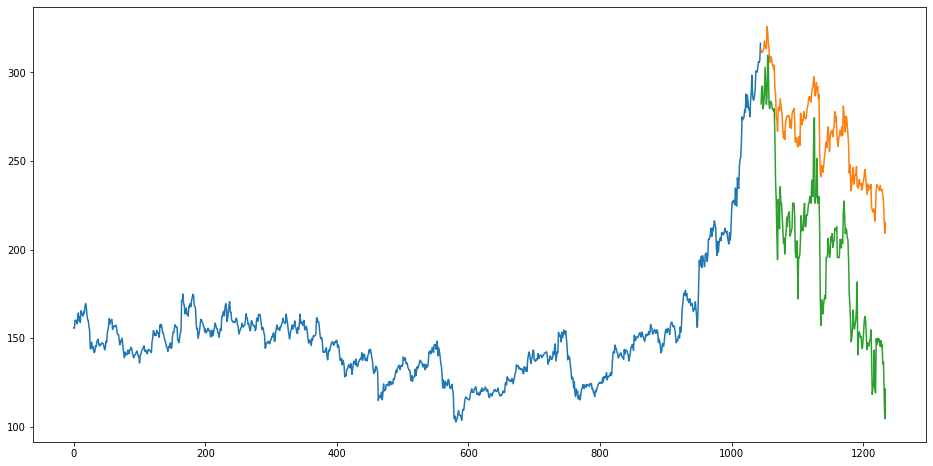

In [28]:
valid_knn['Predictions'] = preds_knn

plt.figure(figsize=(16,8))
plt.plot(train_knn.Close)
plt.plot(valid_knn.Close)
plt.plot(valid_knn.Predictions);

In [29]:
from pmdarima.arima import auto_arima

In [32]:
df_arima = df.copy()
train_arima = df_arima[:1045]
valid_arima = df_arima[1045:]

In [36]:
training = train_arima['Close']
validation = valid_arima['Close']

In [37]:
model_arima = auto_arima(training,
                         start_p=1,
                         start_q=1,
                         max_p=3,
                         max_q=3,
                         m=12,
                         start_P=0,
                         seasonal=True,
                         d=1,
                         D=1,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True) # I copied these params from the site
model_arima.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5979.604, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5652.900, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5979.998, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5548.741, Time=1.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.87 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5547.015, Time=0.90 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5651.640, Time=0.23 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.98 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5548.750, Time=1.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5550.713, Time=2.47 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5548.7

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [39]:
forecast = model_arima.predict(n_periods=190)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [40]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

295.2980115435916

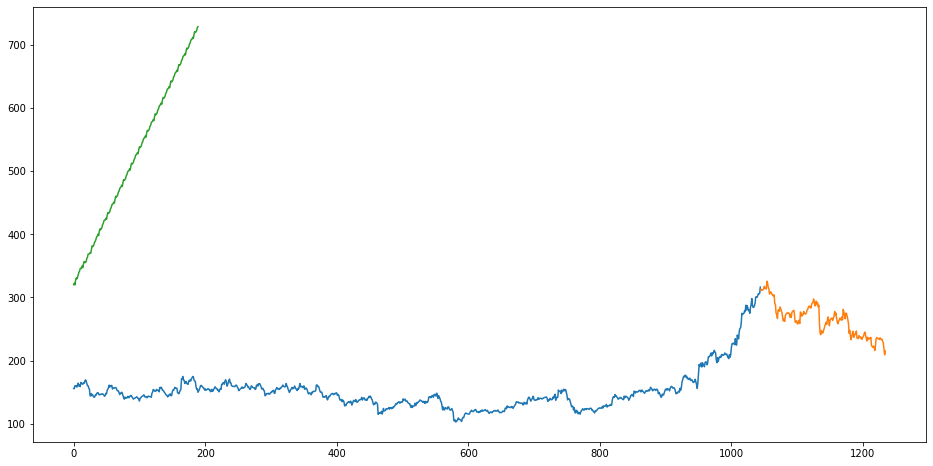

In [43]:
plt.figure(figsize=(16,8))
plt.plot(train_arima.Close)
plt.plot(valid_arima.Close)
plt.plot(forecast.Prediction);

??? I still don't get this, need to learn more. Hyperparameters are copied exactly from [this site](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/).